# How well do jobs and skills pay for Data Scientists?

## Methology

1. Evaluate median salary for top six data jobs
2. Find median salary per skill for Data Scientists
3. Visualise for highest paying skills and most demanded skills

In [36]:
#  Importing Libraries
import ast
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter 

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x:  ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
df_US = df[df["job_country"] == "United States"].dropna(subset="salary_year_avg").copy()


In [38]:
job_titles = df_US["job_title_short"].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [39]:
df_US_top6 = df_US[df_US["job_title_short"].isin(job_titles)]

In [40]:
job_order = df_US_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

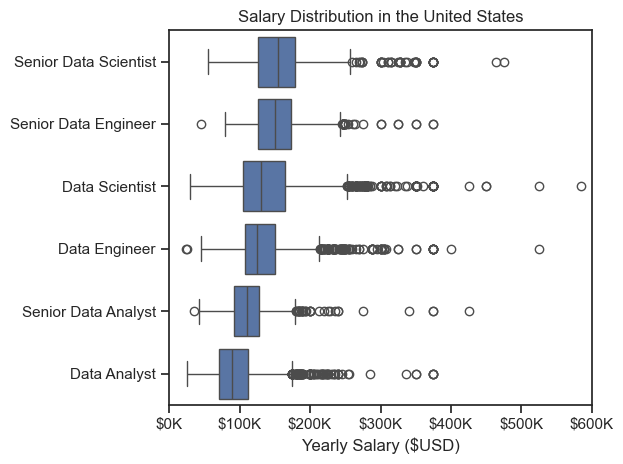

In [41]:
sns.set_theme(style="ticks")
sns.boxplot(data=df_US_top6, x="salary_year_avg", y="job_title_short", order=job_order)
plt.ylabel("")
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
plt.xlim(0,600_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K" ))
plt.tight_layout()
plt.show()

# Investigate Median Salary Vs Skill for Data Scientists

In [42]:
df_DS_US = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")].copy()

df_DS_US = df_DS_US.dropna(subset="salary_year_avg")

In [43]:
df_DS_US = df_DS_US.explode("job_skills")

df_DS_US = df_DS_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])


In [50]:
df_DS_top_pay = df_DS_US.sort_values(by="median", ascending=False).head(10)
df_DS_skills = df_DS_US.sort_values(by="count", ascending=False).head(10)
df_DS_skills = df_DS_skills.sort_values(by="median", ascending=False)

In [51]:
df_DS_skills

,count,median
job_skills,,
tensorflow,474,149646.0
spark,718,135959.5
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
tableau,989,125000.0
hadoop,468,125000.0
excel,490,124290.0


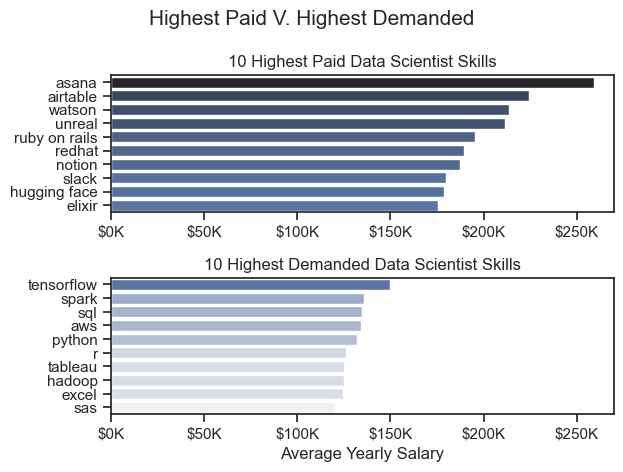

In [55]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

sns.barplot(data=df_DS_top_pay, x="median", y=df_DS_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r" )
ax[0].legend().remove()


ax[0].set_title("10 Highest Paid Data Scientist Skills")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax[0].set_xlim(0,270_000)

sns.barplot(data=df_DS_skills, x="median", y=df_DS_skills.index, ax=ax[1], hue="median", palette = "light:b")
ax[1].legend().remove()


ax[1].set_title("10 Highest Demanded Data Scientist Skills")
ax[1].set_xlabel("Average Yearly Salary")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax[1].set_xlim(0,270_000)


plt.suptitle("Highest Paid V. Highest Demanded", fontsize=15)
plt.tight_layout()
plt.show()